In [1]:
import gsw
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib import rc
import cmocean
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font)

In [2]:
outfile = '/home/aes/git/ashao_forks/MOM6-examples/ocean_only/tracer_mixing/z/prog.nc'
initfile = '/home/aes/git/ashao_forks/MOM6-examples/ocean_only/tracer_mixing/z/Initial_state.nc'
out = nc.Dataset(outfile)
init = nc.Dataset(initfile)
xh = out.variables['xh'][:]
zl = out.variables['zl'][:]

/local/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


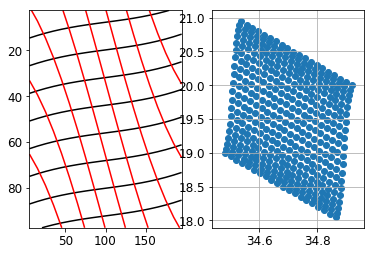

In [3]:
temp_0 = init.variables['Temp'][0,:,0,:]
salt_0 = init.variables['Salt'][0,:,0,:];
S_levels = np.linspace(salt_0.min(),salt_0.max(),10)
T_levels = np.linspace(temp_0.min(),temp_0.max(),10)
plt.subplot(121)
plt.contour(xh,zl,salt_0,S_levels,colors='black')
plt.contour(xh,zl,temp_0,T_levels,colors='red')
plt.gca().invert_yaxis()
plt.subplot(122)
plt.scatter(salt_0.flatten(),temp_0.flatten())
plt.grid()

In [4]:
t = 0
rho_0 = out.variables['rhoinsitu'][t,:,0,:]
temp_0 = out.variables['temp'][t,:,0,:]
salt_0 = out.variables['salt'][t,:,0,:];
t = -1
rho_f = out.variables['rhoinsitu'][t,:,0,:]
temp_f = out.variables['temp'][t,:,0,:]
salt_f = out.variables['salt'][t,:,0,:];

/local/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


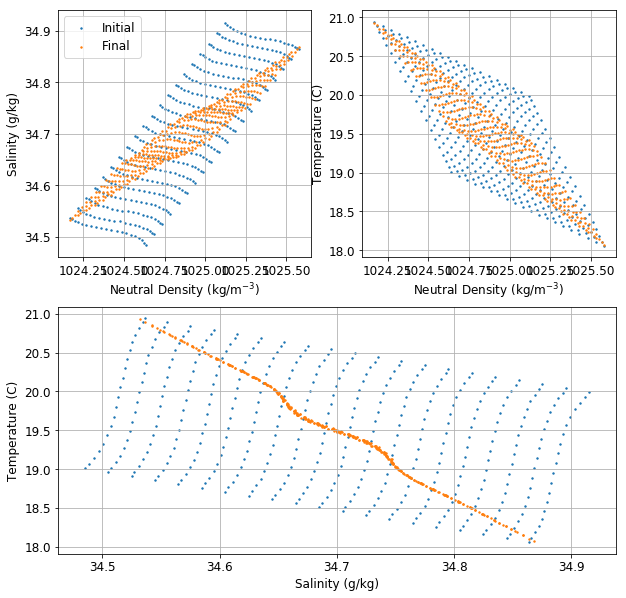

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(rho_0,salt_0,s=2.,label='Initial')
plt.scatter(rho_f,salt_f,s=2.,label='Final')
plt.legend()
plt.xlabel(r'Neutral Density (kg/m$^{-3}$)')
plt.ylabel(r'Salinity (g/kg)')
plt.grid()
plt.subplot(2,2,2)
plt.scatter(rho_0,temp_0,s=2.)
plt.scatter(rho_f,temp_f,s=2.)
plt.xlabel(r'Neutral Density (kg/m$^{-3}$)')
plt.ylabel(r'Temperature (C)')
plt.grid()
plt.subplot(2,2,(3,4))
plt.scatter(salt_0,temp_0,s=2.)
plt.scatter(salt_f,temp_f,s=2.)
plt.grid()
plt.xlabel(r'Salinity (g/kg)')
plt.ylabel(r'Temperature (C)')

In [6]:
salt_0.max()

34.91509938015777

/local/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


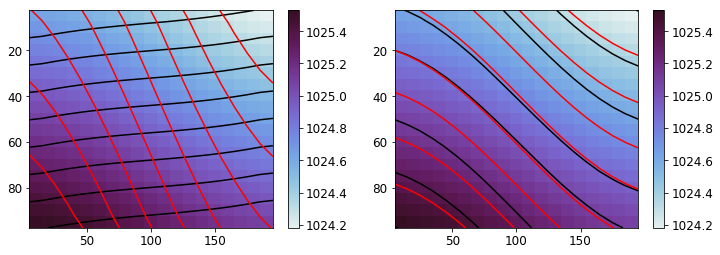

In [7]:
S_levels = np.linspace(salt_0.min(),salt_0.max(),10)
T_levels = np.linspace(temp_0.min(),temp_0.max(),10)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.pcolormesh(xh,zl,rho_0,cmap=cmocean.cm.dense)
plt.colorbar()
plt.contour(xh,zl,salt_0,S_levels,colors='black')
plt.contour(xh,zl,temp_0,T_levels,colors='red')
plt.gca().invert_yaxis()
plt.subplot(122)
plt.pcolormesh(xh,zl,rho_f,cmap=cmocean.cm.dense)
plt.colorbar()
plt.contour(xh,zl,salt_f,S_levels,colors='black')
plt.contour(xh,zl,temp_f,T_levels,colors='red')
plt.gca().invert_yaxis()
